# 1. Import and Install Dependencies

In [39]:
%pip install opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [41]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [42]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [43]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [44]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [67]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [51]:
draw_landmarks(frame, results)

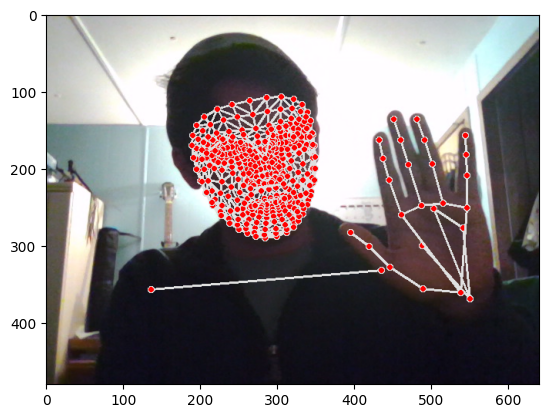

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [53]:
len(results.left_hand_landmarks.landmark)

21

In [54]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [55]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [56]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [58]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [59]:
result_test = extract_keypoints(results)

In [60]:
result_test

array([ 0.44518143,  0.39119747, -0.68776321, ...,  0.        ,
        0.        ,  0.        ])

In [61]:
np.save('0', result_test)   # This will save the individual 0 frame 

In [62]:
np.load('0.npy')   # This will load that individual frame

array([ 0.44518143,  0.39119747, -0.68776321, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [65]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('PreTrained') 

# Actions that we try to detect
actions = np.array(['nothing','hello', 'more', 'love'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [66]:
for action in actions:
    for sequence in range(1, no_sequences + 1):
        if not os.path.exists(os.path.join(DATA_PATH, action, str(sequence))):
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            print(f"Created directory: {os.path.join(DATA_PATH, action, str(sequence))}")



Created directory: PreTrained\nothing\1
Created directory: PreTrained\nothing\2
Created directory: PreTrained\nothing\3
Created directory: PreTrained\nothing\4
Created directory: PreTrained\nothing\5
Created directory: PreTrained\nothing\6
Created directory: PreTrained\nothing\7
Created directory: PreTrained\nothing\8
Created directory: PreTrained\nothing\9
Created directory: PreTrained\nothing\10
Created directory: PreTrained\nothing\11
Created directory: PreTrained\nothing\12
Created directory: PreTrained\nothing\13
Created directory: PreTrained\nothing\14
Created directory: PreTrained\nothing\15
Created directory: PreTrained\nothing\16
Created directory: PreTrained\nothing\17
Created directory: PreTrained\nothing\18
Created directory: PreTrained\nothing\19
Created directory: PreTrained\nothing\20
Created directory: PreTrained\nothing\21
Created directory: PreTrained\nothing\22
Created directory: PreTrained\nothing\23
Created directory: PreTrained\nothing\24
Created directory: PreTra

# 5. Collect Keypoint Values for Training and Testing

In [68]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1, no_sequences + 1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                if sequence in range(1, 31):
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num)) + ".npy"
                    #print(f"Attempting to save to: {npy_path}")
                    np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [122]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [84]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle

        Store variables so that you can pull them back after a restart
# Save variables to a file
with open('variables.pkl', 'wb') as f:
    pickle.dump(variables_to_save, f)

    

# Load variables from the file
with open('variables.pkl', 'rb') as f:
    loaded_variables = pickle.load(f)

In [70]:
label_map = {label:num for num, label in enumerate(actions)}

In [92]:

# Save actions to a file
with open('actions.pkl', 'wb') as f:
    pickle.dump(actions, f)

In [ ]:
with open("action.txt", "w") as f:
    f.write(action)

RESTART KERNAL

In [ ]:
# Load actions from the file
with open('actions.pkl', 'rb') as f:
    loaded_actions = pickle.load(f)


In [ ]:
# Load actions from the file
with open("action.txt", "r") as f:
    action = f.read()

In [71]:
label_map

{'nothing': 0, 'hello': 1, 'more': 2, 'love': 3}

In [72]:
sequences, labels = [], []   # features, labels [x,y]
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []      # represent all the frames for that sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [128]:
action

'love'

In [93]:
import os
import pickle
import numpy as np

try:
    DATA_PATH = os.path.join('PreTrained')    # Set your data path here
    label_map = {label: num for num, label in enumerate(actions)}  # Define your label mapping

    sequences = []
    labels = []

    for action in actions:
        sequence_files = sorted(
            [os.path.join(DATA_PATH, action, f) for f in os.listdir(os.path.join(DATA_PATH, action)) if f.endswith(".npy")]
        )  # Sort for consistency
        for sequence_file in sequence_files:
            sequence_num = int(os.path.splitext(os.path.basename(sequence_file))[0])
            if not 0 < sequence_num < 31:  # Check for valid sequence range
                continue
            window = []
            for frame_num in range(sequence_length):
                frame_path = os.path.join(DATA_PATH, action, str(sequence_num), f"{frame_num}.npy")
                try:
                    res = np.load(frame_path)
                    window.append(res)
                except FileNotFoundError:
                    print(f"Warning: File not found: {frame_path}")
            sequences.append(window)
            labels.append(label_map[action])

    with open("sequences_labels.pkl", "wb") as f:
        pickle.dump((sequences, labels), f)

except (KeyError, ValueError) as e:
    print(f"Error: {e}")  # Handle potential issues


In [ ]:
# Loading sequences and labels from the saved file
with open('sequences_labels.pkl', 'rb') as f:
    sequences, labels = pickle.load(f)

In [87]:
np.array(sequences).shape

(120, 30, 1662)

In [74]:
np.array(labels).shape

(120,)

In [75]:
X = np.array(sequences)

In [76]:
X.shape

(120, 30, 1662)

In [77]:
y = to_categorical(labels).astype(int)

In [78]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [80]:
y_test.shape

(6, 4)

# 7. Build and Train LSTM Neural Network

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [89]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [94]:
#Building the Model 
model = Sequential() #sequential api.. helps you add layers
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [95]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) #multiclass modification model we need crossentropy

In [97]:
model.fit(X_train, y_train, epochs=1400, callbacks=[tb_callback]) # this is training the model

Epoch 1/2000
4/4 [==============================] - 0s 46ms/step - loss: 0.3107 - categorical_accuracy: 0.8421
Epoch 2/2000
4/4 [==============================] - 0s 41ms/step - loss: 0.3117 - categorical_accuracy: 0.8246
Epoch 3/2000
4/4 [==============================] - 0s 41ms/step - loss: 0.3761 - categorical_accuracy: 0.7807
Epoch 4/2000
4/4 [==============================] - 0s 43ms/step - loss: 0.3212 - categorical_accuracy: 0.8421
Epoch 5/2000
4/4 [==============================] - 0s 42ms/step - loss: 0.3834 - categorical_accuracy: 0.7895
Epoch 6/2000
4/4 [==============================] - 0s 40ms/step - loss: 0.4234 - categorical_accuracy: 0.7368
Epoch 7/2000
4/4 [==============================] - 0s 42ms/step - loss: 0.4116 - categorical_accuracy: 0.7368
Epoch 8/2000
4/4 [==============================] - 0s 41ms/step - loss: 0.3827 - categorical_accuracy: 0.7456
Epoch 9/2000
4/4 [==============================] - 0s 43ms/step - loss: 0.3358 - categorical_accuracy: 0.7895
E

Epoch at 20000 is a little high for low data. STOP training early if accuracy is acceptable and loss has stopped cosistently decreashing

tb_callback: should all fit in our memory for now

while the model is running and being trained. You can look at the tensorboard call back
* Check the Logs folder/events.out
* go to cmd
* cd into the log/train
* type: tensorboard --logdir=.
* it will give you a localhost url that will give you graph of the model:  http://localhost:6006/



In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 59670

# 8. Make Predictions

In [99]:
res = model.predict(X_test)

1/1 [==============================] - 0s 321ms/step


In [107]:
actions[np.argmax(res[3])]  #argmax will give you the position action. and action will display the name of that action

'nothing'

In [106]:
actions[np.argmax(y_test[3])]  #the index number should max when testing

'love'

# 9. Save Weights

In [108]:
model.save('action.h5')

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
del model  #Incase you need to delete. Make sure to runt the Build model again and compile

In [110]:
from keras.models import load_model

# Define the path to the model file
model_filename = 'action.h5'

try:
    # Load the model
    model = load_model(model_filename)
    print(f"Model {model_filename} loaded successfully.")
except Exception as e:
    print(f"Error loading model {model_filename}: {str(e)}")


Model action.h5 loaded successfully.


In [111]:
model.load_weights('action.h5')  # load the model 

# 10. Evaluation using Confusion Matrix and Accuracy

In [112]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score  #identify true positives and negatives

In [113]:
yhat = model.predict(X_test) #you can change to the train data x_train

1/1 [==============================] - 0s 370ms/step


In [114]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [115]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0., 6.],
        [0., 0.]],

       [[5., 0.],
        [1., 0.]],

       [[4., 0.],
        [2., 0.]],

       [[3., 0.],
        [3., 0.]]])

In [116]:
accuracy_score(ytrue, yhat)

0.0

# 11. Test in Real Time

In [117]:
from scipy import stats

In [130]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    print(f"Lengths: colors={len(colors)}, res={len(res)}")
    for num, prob in enumerate(res):
        # Choose the color for visualization
        if num < len(colors):
            combined_color = tuple(reversed(colors[num]))
        else:
            # Default color when the index exceeds the available colors
            combined_color = (255, 0, 0)  # Red color

        # Draw the rectangle and label
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40),
                      combined_color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame


Lengths: colors=3, res=4


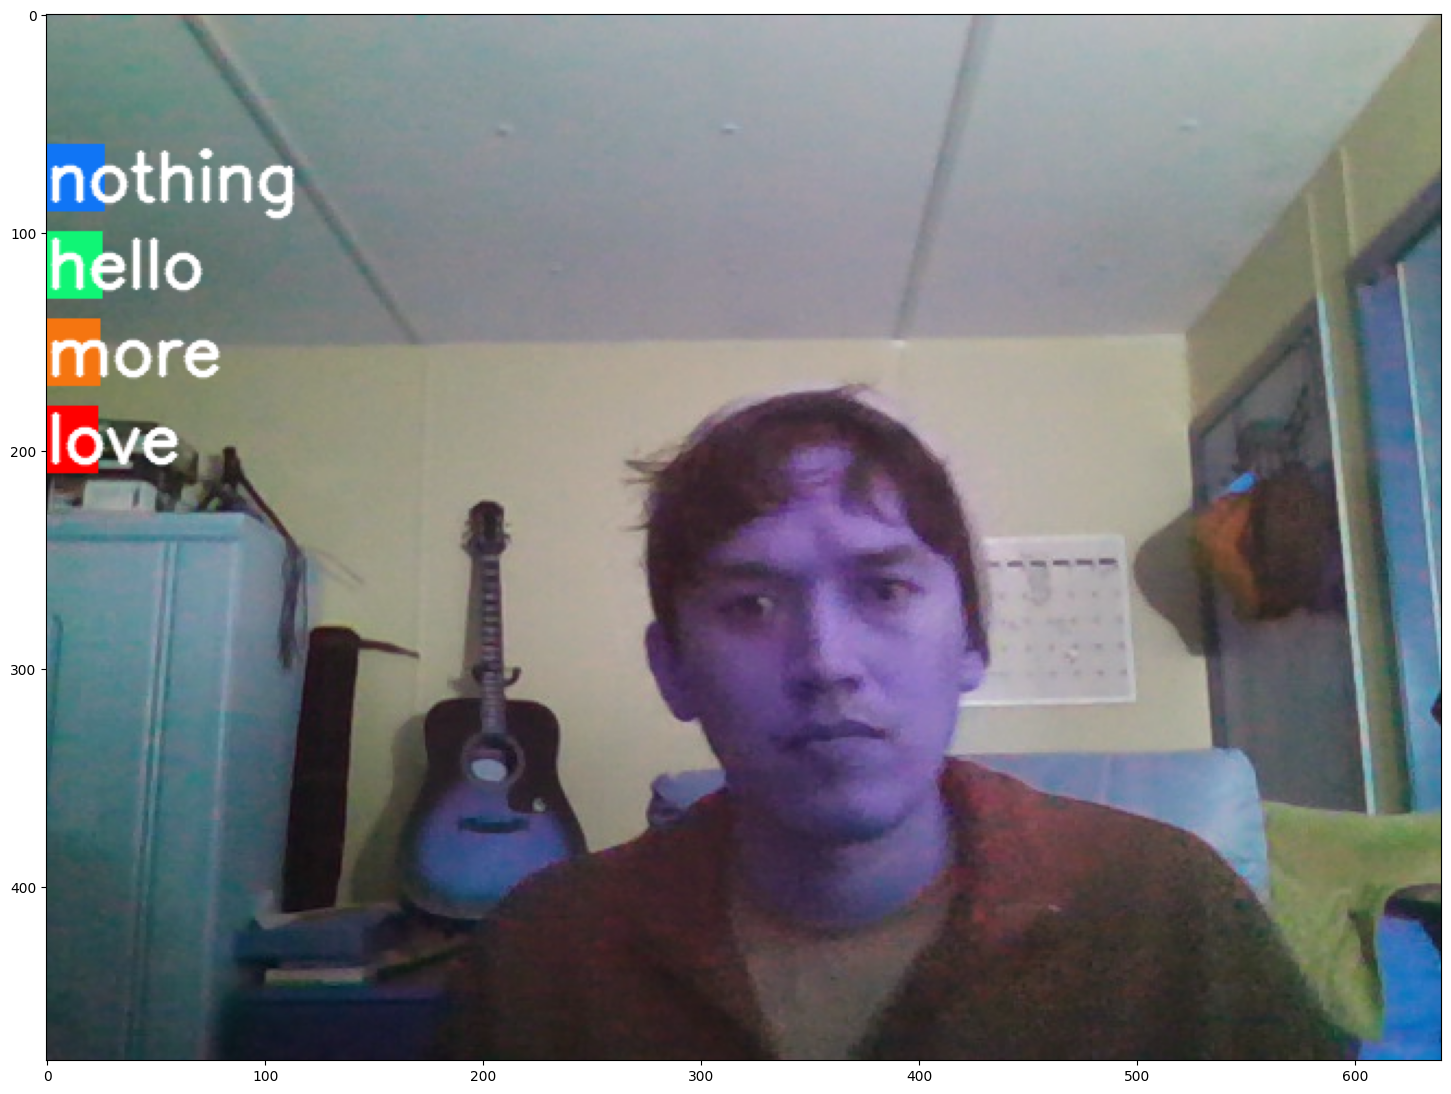

In [131]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [132]:
# 1. New detection variables
sequence = [] # collect the frames to generate prediction
sentence = []  # contatenate a history of detections togeter
predictions = [] 
threshold = 0.6   # confidence matrix making sure only to show > .5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()